In [2]:
#Importing Libraries required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

In [29]:
#Importing the data

datalink="http://bit.ly/w-data"
data= pd.read_csv(datalink)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


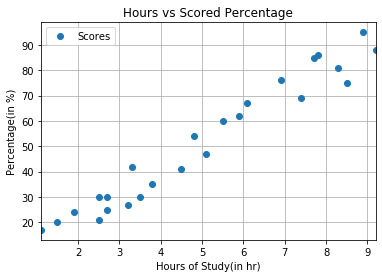

In [31]:
#Data Visualization

data.plot(x="Hours", y= "Scores", style="o")
plt.title("Hours vs Scored Percentage")
plt.xlabel("Hours of Study(in hr)")
plt.ylabel("Percentage(in %)")
plt.grid()
plt.show()

In [32]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


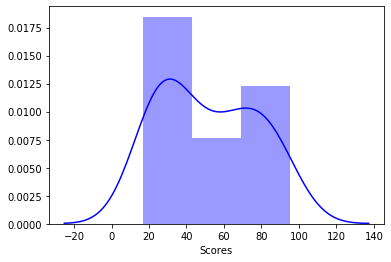

In [16]:
sbn.distplot(data['Scores'], color='blue')
plt.show()

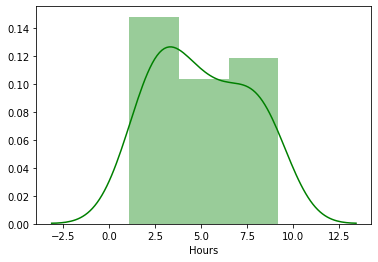

In [15]:
sbn.distplot(data['Hours'], color='green')
plt.show()

In [33]:
#Displaying mean of the scored percentage
print("Average Scored Percentage is",data["Scores"].mean())

Average Scored Percentage is 51.48


In [35]:
#Data Splitting

from sklearn.model_selection import train_test_split
x=data[['Hours']].values
y=data[['Scores']].values
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(20, 1) (20, 1) (5, 1) (5, 1)


In [39]:
#Model training

from sklearn.linear_model import LinearRegression
linearreg= LinearRegression()
linearreg.fit(x_train, y_train)
y_predict=linearreg.predict(x_train)
regression = LinearRegression()
regression.fit(x_train, y_train)
print("Training Completed")

Training Completed


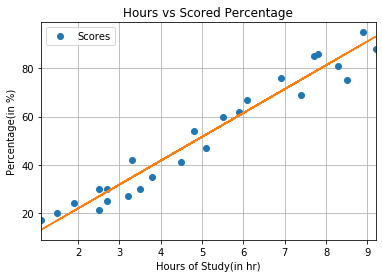

In [41]:
#Plotting the Trained Data as Regression line

data.plot(x="Hours", y= "Scores", style="o")
plt.title("Hours vs Scored Percentage")
plt.xlabel("Hours of Study(in hr)")
plt.ylabel("Percentage(in %)")
line= regression.coef_*x+regression.intercept_
plt.plot(x, line)
plt.grid()
plt.show()

In [43]:
print("Test Score:",regression.score(x_test, y_test))
print("Training Score:",regression.score(x_train, y_train))

Test Score: 0.9454906892105356
Training Score: 0.9515510725211553


In [46]:
data= pd.DataFrame({'Actual': [y_test], 'Predicted': [y_predict]})
data

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[39.67865466787518], [20.84840735465493], [79..."


In [48]:
print('Score of the student who studied for 9.25 hours a day is:')
print(regression.predict([[9.25]]))

Score of the student who studied for 9.25 hours a day is:
[[93.69173249]]
